# 1) Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# 2) Data Loading

In [3]:
df = pd.read_csv('Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Exploring data

In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    str    
 4   Sex          891 non-null    str    
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    str    
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    str    
 11  Embarked     889 non-null    str    
dtypes: float64(2), int64(5), str(5)
memory usage: 83.7 KB


# 3) Exploratory Data Analysis

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
median_imputer = SimpleImputer(strategy = 'median')
df[['Age']] = median_imputer.fit_transform(df[['Age']])
cat_imputer = SimpleImputer(strategy='most_frequent')
df[['Embarked']] = cat_imputer.fit_transform(df[['Embarked']])
df['Cabin'] = df['Cabin'].fillna('Unknown')
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name               str
Sex                str
Age            float64
SibSp            int64
Parch            int64
Ticket             str
Fare           float64
Cabin              str
Embarked           str
dtype: object

In [10]:
df['Sex'] = df['Sex'].replace({'male' : 1, 'female' : 0})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,Unknown,S


In [11]:
df['Family Size'] = df['SibSp'] + df['Parch'] + 1
df.drop(columns = ['SibSp', 'Parch', 'Name', 'Ticket', 'Cabin'], inplace = True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Family Size
0,1,0,3,1,22.0,7.2500,S,2
1,2,1,1,0,38.0,71.2833,C,2
2,3,1,3,0,26.0,7.9250,S,1
3,4,1,1,0,35.0,53.1000,S,2
4,5,0,3,1,35.0,8.0500,S,1


In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,Fare,Family Size
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,32.204208,1.904602
std,257.353842,0.486592,0.836071,13.019697,49.693429,1.613459
min,1.000000,0.000000,1.000000,0.420000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,22.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,28.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,35.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,80.000000,512.329200,11.000000


In [13]:
correlation_matrix = df.drop(columns = ['Embarked']).corr()
correlation_matrix['Survived'].sort_values(ascending = False)

Survived       1.000000
Fare           0.257307
Family Size    0.016639
PassengerId   -0.005007
Age           -0.064910
Pclass        -0.338481
Sex           -0.543351
Name: Survived, dtype: float64

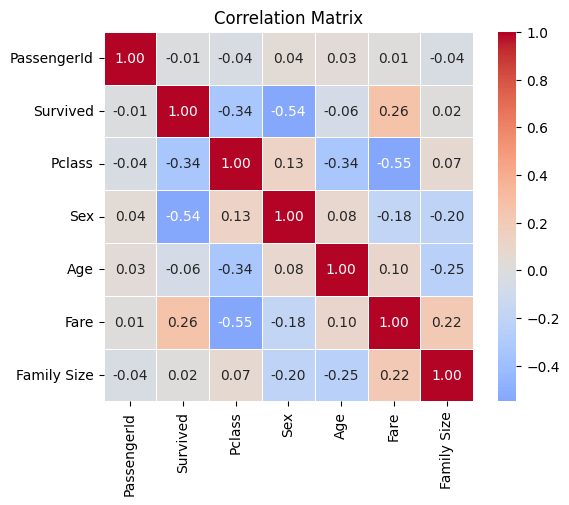

In [43]:
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', center= 0 , square = True, linewidths = 0.5, fmt = '.2f')
plt.title('Correlation Matrix')
plt.show()

# 4) Data Preprocessing

In [15]:
X = df.drop(columns = ['Survived', 'Embarked'])
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("X_train shape:", X_train_scaled.shape)
print("X_test shape:", X_test_scaled.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (712, 6)
X_test shape: (179, 6)
y_train shape: (712,)
y_test shape: (179,)


# 5) Model Training and Evaluation

$ a)  BernoulliNB $

In [16]:
bernoulli_model = BernoulliNB()
bernoulli_model.fit(X_train_scaled, y_train)
y_pred_bernoulli = bernoulli_model.predict(X_test_scaled)
print("BernoulliNB Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bernoulli))
print("\nBernoulliNB Accuracy:", accuracy_score(y_test, y_pred_bernoulli))
print("\nBernoulliNB Precision:", precision_score(y_test, y_pred_bernoulli, average=None))
print("\nBernoulliNB Recall:", recall_score(y_test, y_pred_bernoulli, average=None))
print("\nBernoulliNB F1 Score:", f1_score(y_test, y_pred_bernoulli, average=None))

BernoulliNB Confusion Matrix:
 [[86 24]
 [22 47]]

BernoulliNB Accuracy: 0.7430167597765364

BernoulliNB Precision: [0.7962963  0.66197183]

BernoulliNB Recall: [0.78181818 0.68115942]

BernoulliNB F1 Score: [0.78899083 0.67142857]


In [17]:
bernoulli_cross_val_scores = cross_val_score(bernoulli_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("BernoulliNB Cross-Validation Accuracy Scores:\n", bernoulli_cross_val_scores)

BernoulliNB Cross-Validation Accuracy Scores:
 [0.74125874 0.74825175 0.75352113 0.82394366 0.73943662]


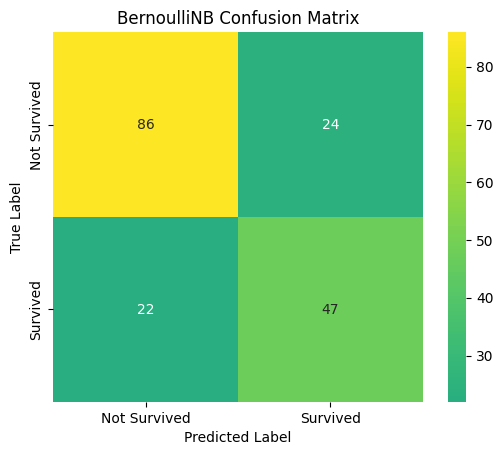

In [38]:
sns.heatmap(confusion_matrix(y_test, y_pred_bernoulli), annot = True, cmap = 'viridis', center= 0 , square = True, fmt = 'd',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.title('BernoulliNB Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

$ b) GaussianNB $

In [19]:
gaussian_model = GaussianNB()
gaussian_model.fit(X_train_scaled, y_train)
y_pred_gaussian = gaussian_model.predict(X_test_scaled)
print("GaussianNB Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gaussian))
print("\nGaussianNB Accuracy:", accuracy_score(y_test, y_pred_gaussian))
print("\nGaussianNB Precision:", precision_score(y_test, y_pred_gaussian, average=None))
print("\nGaussianNB Recall:", recall_score(y_test, y_pred_gaussian, average=None))
print("\nGaussianNB F1 Score:", f1_score(y_test, y_pred_gaussian, average=None))

GaussianNB Confusion Matrix:
 [[91 19]
 [20 49]]

GaussianNB Accuracy: 0.7821229050279329

GaussianNB Precision: [0.81981982 0.72058824]

GaussianNB Recall: [0.82727273 0.71014493]

GaussianNB F1 Score: [0.82352941 0.71532847]


In [20]:
gaussian_cross_val_scores = cross_val_score(gaussian_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("GaussianNB Cross-Validation Accuracy Scores:\n", gaussian_cross_val_scores)

GaussianNB Cross-Validation Accuracy Scores:
 [0.74825175 0.76923077 0.80985915 0.79577465 0.83098592]


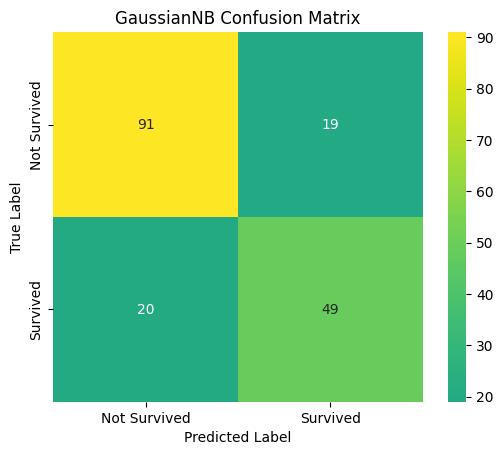

In [39]:
sns.heatmap(confusion_matrix(y_test, y_pred_gaussian), annot = True, cmap = 'viridis', center= 0 , square = True, fmt = 'd',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.title('GaussianNB Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

$ c) Logistic Regression $

In [22]:
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg_model.predict(X_test_scaled)
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("\nLogistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("\nLogistic Regression Precision:", precision_score(y_test, y_pred_log_reg, average=None))
print("\nLogistic Regression Recall:", recall_score(y_test, y_pred_log_reg, average=None))
print("\nLogistic Regression F1 Score:", f1_score(y_test, y_pred_log_reg, average=None))

Logistic Regression Confusion Matrix:
 [[96 14]
 [21 48]]

Logistic Regression Accuracy: 0.8044692737430168

Logistic Regression Precision: [0.82051282 0.77419355]

Logistic Regression Recall: [0.87272727 0.69565217]

Logistic Regression F1 Score: [0.84581498 0.73282443]


In [23]:
log_reg_cross_val_scores = cross_val_score(log_reg_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Logistic Regression Cross-Validation Accuracy Scores:\n", log_reg_cross_val_scores)

Logistic Regression Cross-Validation Accuracy Scores:
 [0.78321678 0.75524476 0.79577465 0.79577465 0.80985915]


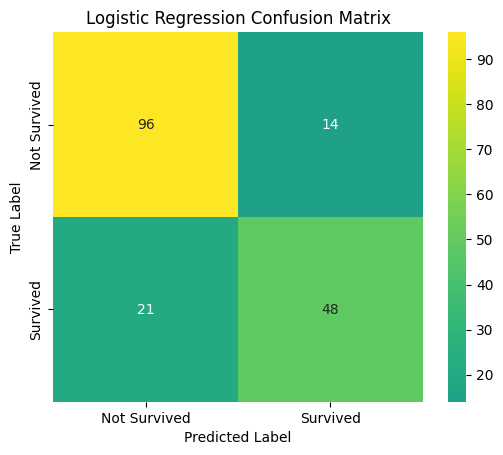

In [40]:
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot = True, cmap = 'viridis', center= 0 , square = True, fmt = 'd',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 6) Comparing and Choosing Best Model

/tmp/ipykernel_15199/1887465503.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = ['BernoulliNB', 'GaussianNB', 'Logistic Regression'],


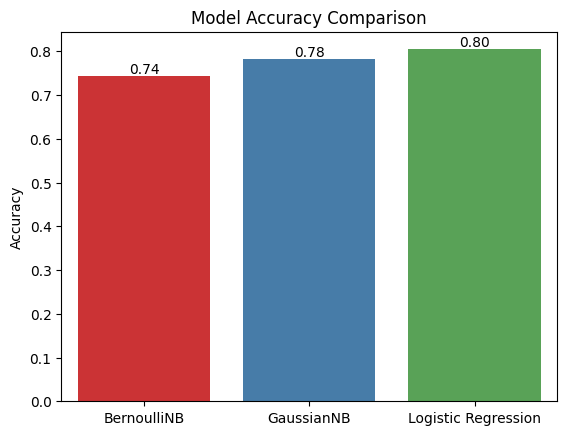

In [45]:
ax = sns.barplot(x = ['BernoulliNB', 'GaussianNB', 'Logistic Regression'],
            y = [accuracy_score(y_test, y_pred_bernoulli),
                 accuracy_score(y_test, y_pred_gaussian),
                 accuracy_score(y_test, y_pred_log_reg)], palette='Set1')
for container in ax.containers:
     ax.bar_label(container, fmt='%.2f')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

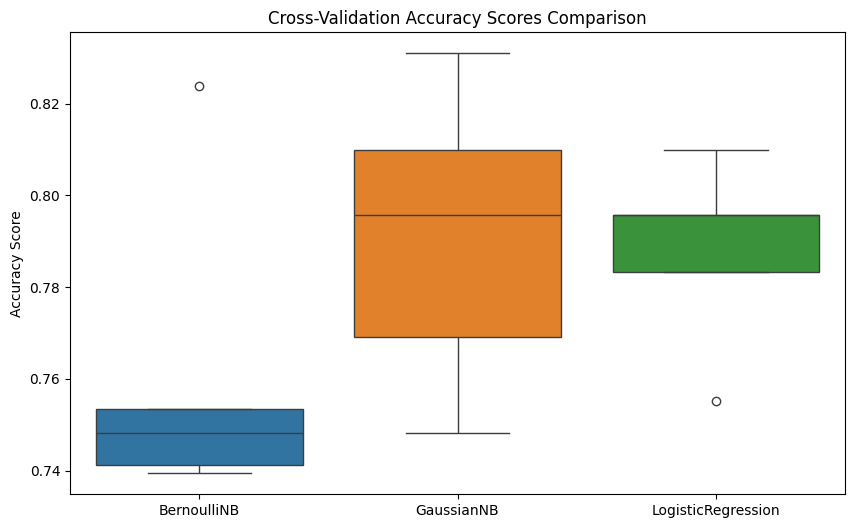

In [ ]:
cv_data = pd.DataFrame({
    'BernoulliNB': bernoulli_cross_val_scores,
    'GaussianNB': gaussian_cross_val_scores,
    'LogisticRegression': log_reg_cross_val_scores
})
plt.figure(figsize=(10, 6))
sns.boxplot(data=cv_data)
plt.title('Cross-Validation Accuracy Scores Comparison')
plt.ylabel('Accuracy Score')
plt.show()

Among all models Logistic Regression performed good 